In [1]:
import os
import sys
src_path = sys.path[0].replace("figures", "src")
# data_path = sys.path[0].replace("notebooks", "data")
if src_path not in sys.path:
    sys.path.append(src_path)

out_path = sys.path[0].replace("figures", "output")

import warnings
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime, timedelta

from profile_extraction import ProfileExtraction
from data_loader import UCSD_dataloader
from utils.plot_utils import *
customize_plt() # customize plt configs, see plot_utils

exp_suffix = "Mar2023"
exp_folder = os.path.join(out_path, "experiments", exp_suffix)
assert os.path.exists(exp_folder)

g:\Anaconda\Anaconda3\envs\base38\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# load data set
loader = UCSD_dataloader
loaded = loader(tstart=datetime(2019,1,1,0,0), tend=datetime(2020,1,1,0,0), delta=0.25, 
                bld="Hopkins", pv="Hopkins", ev="OSLER", pv_to_bld=0.5, ev_to_bld=0.2, Pmax=10)
data = loaded.get_data()

!!!!!!!!!! MISSING VALUES !!!!!!!!!! || [bld] has [4] missing values
!!!!!!!!!! MISSING VALUES !!!!!!!!!! || [pv] has [4] missing values
!!!!!!!!!! EV SHORT DURATION !!!!!!!!!! || drop 81 sessions


In [30]:
load_s = data["load_bld"]

In [31]:
hour = load_s.index.hour
month = load_s.index.month
week = load_s.index.isocalendar().week

weekday = (load_s.index.weekday < 5)

In [42]:
res = load_s.groupby([weekday, hour]).agg(np.nanmean) #lambda x: np.nanpercentile(x, q=75))

In [43]:
y1 = res.loc[(False,slice(None))]
y2 = res.loc[(True,slice(None))]

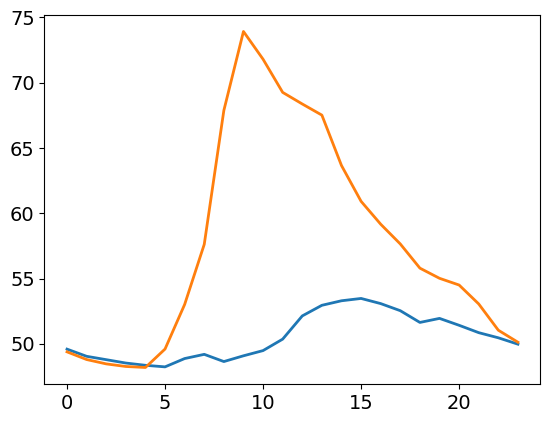

In [44]:
plt.plot(y1)
plt.plot(y2)